## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../fake_job_postings.csv")

## Understanding Dataset

In [3]:
print("Dataset Shape:", df.shape)
print("Null Values:")
print(df.isnull().sum())

Dataset Shape: (17880, 18)
Null Values:
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


## Replacing Null values

In [4]:
col = ['location', 'company_profile', 'department','description', 'requirements', 'benefits','salary_range','employment_type','required_experience','required_education','industry','function']
df[col] = df[col].fillna('NAN')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NAN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NAN,0,1,0,Other,Internship,NAN,NAN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NAN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NAN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NAN,NAN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NAN,0,1,0,NAN,NAN,NAN,NAN,NAN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NAN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NAN,NAN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Dropping Un-required Data columns 
Since the salary range column did not provide any viable information, we have decided to drop it.

In [5]:
df = df.drop(['salary_range'], axis = 1)

# Statistical Ideation

In [6]:
#stats
print(df['fraudulent'].value_counts())
df.describe()

fraudulent
0    17014
1      866
Name: count, dtype: int64


,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#information about dataset Dtype, columns, null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           17880 non-null  object
 4   company_profile      17880 non-null  object
 5   description          17880 non-null  object
 6   requirements         17880 non-null  object
 7   benefits             17880 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      17880 non-null  object
 12  required_experience  17880 non-null  object
 13  required_education   17880 non-null  object
 14  industry             17880 non-null  object
 15  function             17880 non-null  object
 16  frau

# Standardizing Data

In [8]:
#removing punctuations
def clean_col(dframe, columns):
    for column in columns:
        if column in dframe.columns:
            dframe[column] = (
                dframe[column]
                .str.replace(r'[^\w\s]', '', regex=True)
                .str.replace(' ', '', regex=False)
                .str.strip()
                .str.lower()
            )
    return dframe


columns = ['title', 'location', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type']

cleaned_df = clean_col(df, columns)
print(cleaned_df.head(5))


   job_id                                title        location department  \
0       1                      marketingintern     usnynewyork  Marketing   
1       2  customerservicecloudvideoproduction      nzauckland    Success   
2       3   commissioningmachineryassistantcma       usiawever        NAN   
3       4         accountexecutivewashingtondc  usdcwashington      Sales   
4       5                    billreviewmanager   usflfortworth        NAN   

                                     company_profile  \
0  werefood52andwevecreatedagroundbreakingandawar...   
1  90secondstheworldscloudvideoproductionservice9...   
2  valorservicesprovidesworkforcesolutionsthatmee...   
3  ourpassionforimprovingqualityoflifethroughgeog...   
4  spotsourcesolutionsllcisaglobalhumancapitalman...   

                                         description  \
0  food52afastgrowingjamesbeardawardwinningonline...   
1  organisedfocusedvibrantawesomedoyouhaveapassio...   
2  ourclientlocatedinhoustonisac

# Imputing Missing Values

In [9]:
def imputetion(dframe):
    # Replace placeholder strings with actual NaN values
    dframe = dframe.replace(['NAN', 'nan', 'NaN', 'None'], np.nan)

    # Fill missing values
    for column in dframe.columns:
        if dframe[column].dtype in ['float64', 'int64']:  # Numeric columns
            dframe[column] = dframe[column].fillna(dframe[column].mean())
        else:  # Categorical or non-numeric columns
            mode = dframe[column].mode().iloc[0] if not dframe[column].mode().empty else ''
            dframe[column] = dframe[column].fillna(mode)

    return dframe

# Apply the function to the DataFrame
imputed_df = imputetion(cleaned_df)

# Check for remaining null values to verify
print(imputed_df.isnull().sum())


job_id                 0
title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64


In [10]:
#EDA step2- categorical data and OHE

def convert_columns_to_categorical(dataframe, columns):

  for col in columns:
    if col in dataframe.columns:
      dataframe[col] = dataframe[col].astype('category')
    return dataframe

columns_to_convert = ['title', 'location', 'department', 'employment_type', 'company_profile', 'description', 'requirements', 'benefits', 'required_experience', 'required_education', 'industry', 'function']
df_converted = convert_columns_to_categorical(imputed_df, columns_to_convert)


print(df_converted.dtypes)
df_converted.head()

job_id                    int64
title                  category
location                 object
department               object
company_profile          object
description              object
requirements             object
benefits                 object
telecommuting             int64
has_company_logo          int64
has_questions             int64
employment_type          object
required_experience      object
required_education       object
industry                 object
function                 object
fraudulent                int64
dtype: object


,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,marketingintern,usnynewyork,Marketing,werefood52andwevecreatedagroundbreakingandawar...,food52afastgrowingjamesbeardawardwinningonline...,experiencewithcontentmanagementsystemsamajorpl...,seejobdescription,0,1,0,other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,2,customerservicecloudvideoproduction,nzauckland,Success,90secondstheworldscloudvideoproductionservice9...,organisedfocusedvibrantawesomedoyouhaveapassio...,whatweexpectfromyouyourkeyresponsibilitywillbe...,whatyouwillgetfromusthroughbeingpartofthe90sec...,0,1,0,fulltime,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,3,commissioningmachineryassistantcma,usiawever,Sales,valorservicesprovidesworkforcesolutionsthatmee...,ourclientlocatedinhoustonisactivelyseekinganex...,implementprecommissioningandcommissioningproce...,seejobdescription,0,1,0,fulltime,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,4,accountexecutivewashingtondc,usdcwashington,Sales,ourpassionforimprovingqualityoflifethroughgeog...,thecompanyesrienvironmentalsystemsresearchinst...,education bachelorsormastersingisbusinessadmin...,ourcultureisanythingbutcorporatewehaveacollabo...,0,1,0,fulltime,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,billreviewmanager,usflfortworth,Sales,spotsourcesolutionsllcisaglobalhumancapitalman...,jobtitleitemizationreviewmanagerlocationfortwo...,qualificationsrnlicenseinthestateoftexasdiplom...,fullbenefitsoffered,0,1,1,fulltime,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [11]:
#one hot encoding
def ohe(dataframe, columns):

    dataframe_encoded = pd.get_dummies(dataframe, columns=columns, drop_first=True)
    return dataframe_encoded

col_encode_ohe = ['title', 'location', 'department', 'employment_type', 'company_profile', 'description', 'requirements', 'benefits', 'required_experience', 'required_education', 'industry', 'function']
df_encoded_ohe = ohe(df_converted, col_encode_ohe)
df_encoded_ohe.head()
df_encoded_ohe['fraudulent'].unique()

array([0, 1])

In [12]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

## Handling outliers

In [13]:
def handle_outliers(df, columns, target_column):
    for col in columns:
        if col == target_column:
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = np.where(
            df[col] < lower_bound, lower_bound,
            np.where(df[col] > upper_bound, upper_bound, df[col])
        )
    return df

df_no_outliers = handle_outliers(df_encoded_ohe, numeric_cols, target_column='fraudulent')


## Splitting Dataset

In [14]:
X = df_no_outliers.drop(columns=['fraudulent'])
y = df_no_outliers['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training features:", X_train.shape)
print("Test features:", X_test.shape)
print("Training target:", y_train.shape)
print("Test target:", y_test.shape)


Training features: (14304, 48805)
Test features: (3576, 48805)
Training target: (14304,)
Test target: (3576,)


## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

tree_accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {tree_accuracy:.4f}")

Decision Tree Accuracy: 0.9866


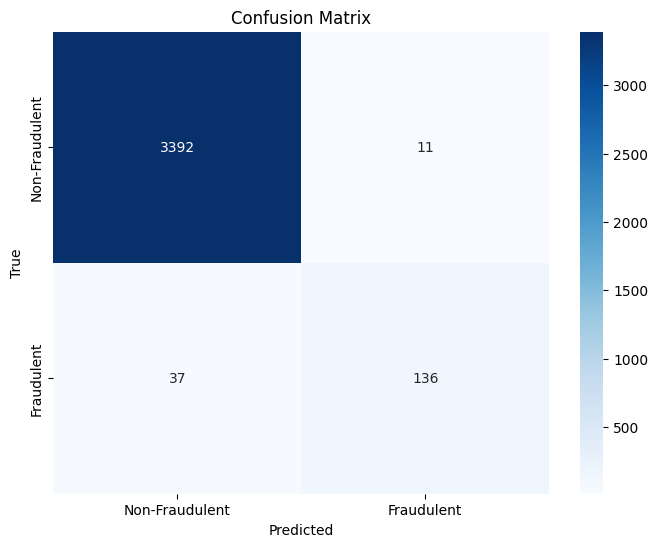

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_tree)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraudulent", "Fraudulent"], yticklabels=["Non-Fraudulent", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

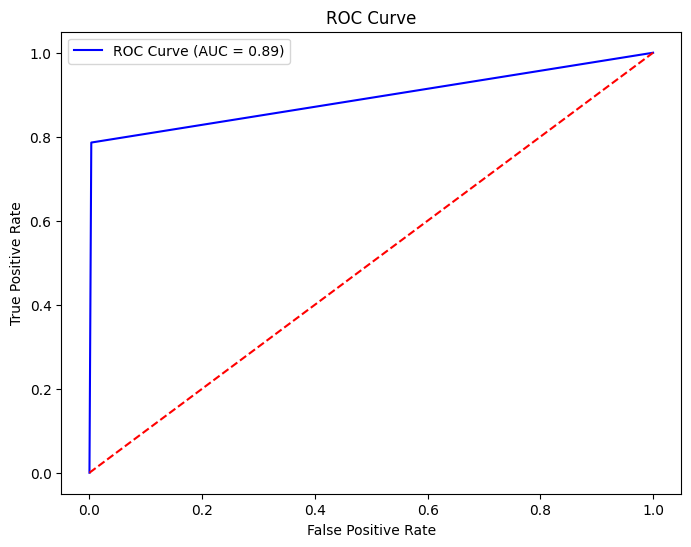

In [17]:
from sklearn.metrics import roc_curve, auc

# Assuming you have predicted probabilities
y_pred_proba = tree_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

Gradient Boosting Accuracy: 0.9832


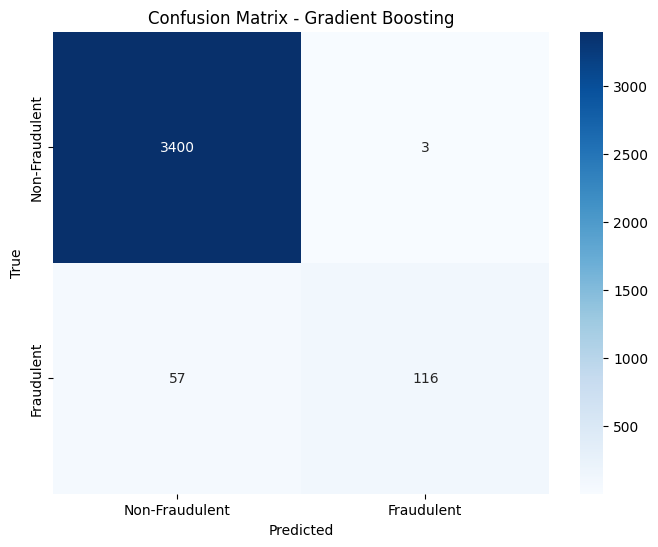

In [20]:
cm_boost = confusion_matrix(y_test, y_pred_gb)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraudulent", "Fraudulent"], yticklabels=["Non-Fraudulent", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

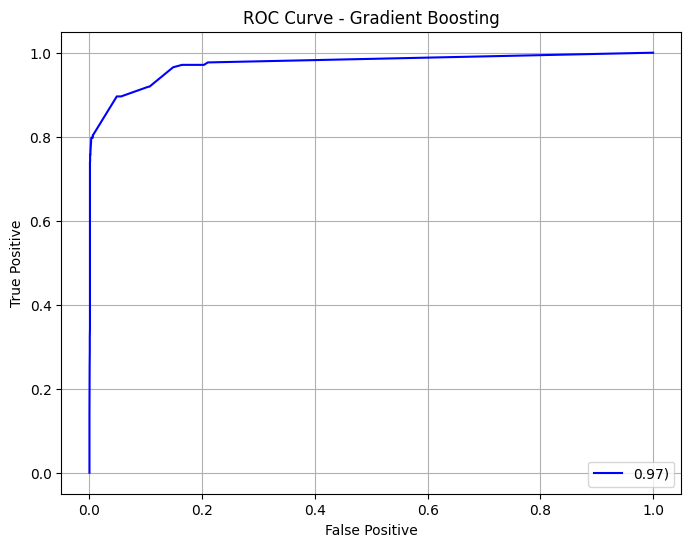

In [21]:
y_pred_boost = gb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_boost)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'{roc_auc:.2f})')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

forest_accuracy = accuracy_score(y_test, y_pred_forest)
print(f"Random Forest accuracy: {forest_accuracy:.4f}")

Random Forest accuracy: 0.9832


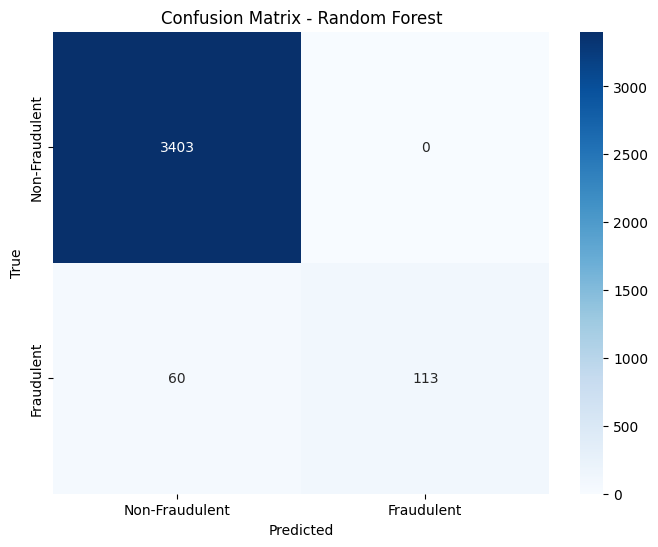

In [23]:
cm_random = confusion_matrix(y_test, y_pred_forest)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_random, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraudulent", "Fraudulent"], yticklabels=["Non-Fraudulent", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

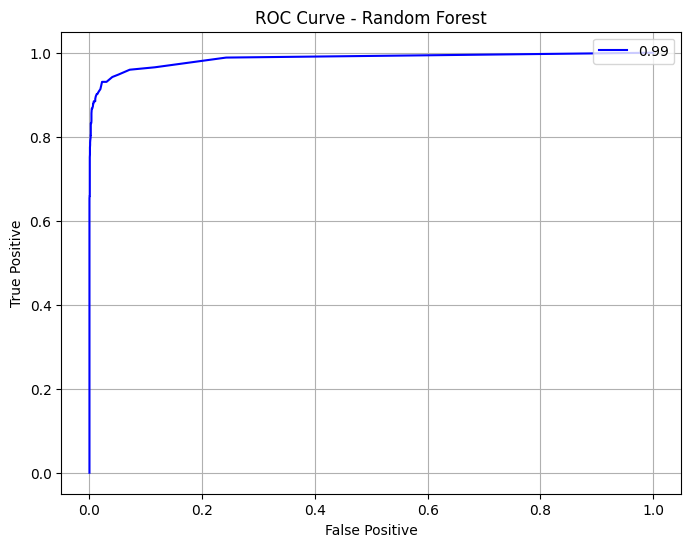

In [24]:
y_pred_random = forest_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_random)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'{roc_auc:.2f}')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='upper right')
plt.grid()
plt.show()

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\patil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9762304250559284


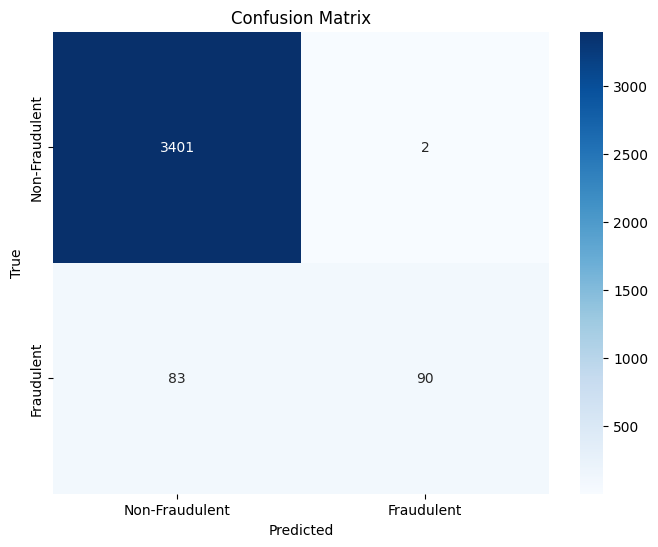

In [26]:
cm_logit = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logit, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraudulent", "Fraudulent"], yticklabels=["Non-Fraudulent", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machines

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model_smv = LinearSVC(max_iter=10000, random_state=42)
model_smv.fit(X_train, y_train)

y_pred = model_smv.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pos', 'Neg'], yticklabels=['Pos', 'Neg'])
plt.title('Support Vector machine - confusion matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()